# Вариант 3

Построить модель линейной регрессии на имеющихся данных

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch.autograd import Variable
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn

In [37]:


df_x = pd.read_csv('x.csv')
df_y = pd.read_csv('y.csv')

df_x.head()

,Unnamed: 0,0
0,0,1.462108
1,1,1.133769
2,2,-2.301539
3,3,1.744812
4,4,0.042214


In [38]:
df_x = df_x.rename({'Unnamed: 0': "first"}, axis=1)
df_y = df_y.rename({'Unnamed: 0': "first"}, axis=1)

res = pd.merge(df_x, df_y, on = 'first' ) # , on=0)

In [39]:
df_res = res.iloc[:, [1,2]]
df_res.head()

,0_x,0_y
0,1.462108,101.159902
1,1.133769,78.442913
2,-2.301539,-159.238195
3,1.744812,120.719533
4,0.042214,2.920673


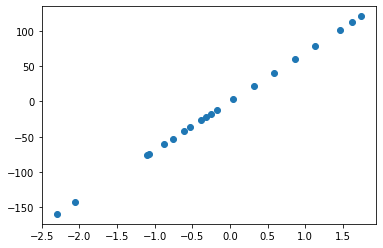

In [40]:
plt.figure()
plt.scatter(df_res['0_x'], df_res['0_y'])
plt.show()

In [41]:
print('размеры: ', df_x.shape, df_y.shape)

размеры:  (20, 2) (20, 2)


In [42]:
df_x.describe()

,first,0
count,20.00000,20.000000
mean,9.50000,-0.133365
std,5.91608,1.128377
min,0.00000,-2.301539
25%,4.75000,-0.790370
50%,9.50000,-0.285894
75%,14.25000,0.653463
max,19.00000,1.744812


In [43]:
df_x.corr()

,first,0
first,1.000000,-0.396406
0,-0.396406,1.000000


In [44]:
df_y.describe()

,first,0
count,20.00000,20.000000
mean,9.50000,-9.227194
std,5.91608,78.069794
min,0.00000,-159.238195
25%,4.75000,-54.683876
50%,9.50000,-19.780337
75%,14.25000,45.211631
max,19.00000,120.719533


In [45]:
data=df_res

In [46]:
len(df_res)

20

In [47]:
from torch.utils.data import Dataset, DataLoader

In [48]:
import torch

In [53]:
class DiamondsDataset(Dataset):
  def __init__(self, data):
    self.X=torch.from_numpy(data['0_x'].values).float()
    self.y=torch.from_numpy(data['0_y'].values).float()
  def __len__(self):
    return self.X.shape[0]

  def __getitem__(self, idx):
    return self.X[idx], self.y[idx]

In [54]:
data_train,data_test=torch.utils.data.random_split(DiamondsDataset(data), [int(len(data)*0.8),int(len(data)*0.2)])

In [55]:
train = DataLoader(data_train, batch_size=4, shuffle=True)

In [56]:
test=DataLoader(data_test, batch_size=4, shuffle=True)

In [57]:
import torch.nn as nn

In [64]:
n_features= 4
n_neurons=10
n_outputs=1
model = nn.Sequential(nn.Linear(n_features, n_neurons),nn.ReLU(),nn.Dropout(0.4),nn.Linear(n_neurons,n_outputs))

losses_train=[]
losses_test=[]
#2. Определиться с функцией потерь
criterion = nn.MSELoss()

# 3. Определяемся с методом оптимизации
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# 4. Процесс обучения
for i in range(1000):
    model.train()
    batch_loss=[]
    for x_example, y_example in test:
        y_pred = model(x_example)
        loss = criterion(y_pred, y_example)
        losses_test.append(loss.item())
    for x_example, y_example in train:
            y_pred = model(x_example)
            loss = criterion(y_pred, y_example)
            batch_loss.append(loss.item())
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            if i%5 == 0:
                print(f'epoch {i}: loss = {loss.item():.8f}')
    losses_train.append(np.mean(batch_loss))


epoch 0: loss = 1640.32067871
epoch 0: loss = 9375.31640625
epoch 0: loss = 11065.42578125
epoch 0: loss = 4998.42578125
epoch 5: loss = 7092.58105469
epoch 5: loss = 10243.46582031
epoch 5: loss = 1144.07202148
epoch 5: loss = 8673.63281250
epoch 10: loss = 1665.56677246
epoch 10: loss = 5910.14453125
epoch 10: loss = 10473.69238281
epoch 10: loss = 9072.91601562
epoch 15: loss = 14061.89746094
epoch 15: loss = 5030.25585938
epoch 15: loss = 1912.18041992
epoch 15: loss = 5825.69531250
epoch 20: loss = 4447.71240234
epoch 20: loss = 8557.13085938
epoch 20: loss = 9154.86914062
epoch 20: loss = 4905.19824219
epoch 25: loss = 6565.36816406
epoch 25: loss = 8469.53808594
epoch 25: loss = 5055.40722656
epoch 25: loss = 6128.73388672
epoch 30: loss = 6105.03369141
epoch 30: loss = 714.31872559
epoch 30: loss = 13414.85742188
epoch 30: loss = 6490.43164062
epoch 35: loss = 10250.01660156
epoch 35: loss = 6556.21777344
epoch 35: loss = 4751.10742188
epoch 35: loss = 4110.00097656
epoch 40: l

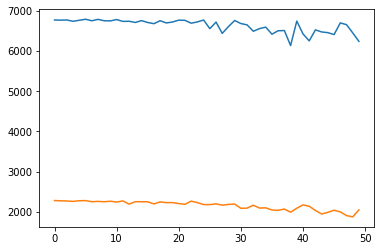

In [65]:
import matplotlib.pyplot as plt

plt.plot(list(range(0,50)),losses_train[:50])
plt.plot(list(range(0,50)),losses_test[:50])
plt.show()

In [66]:
class LinearRegressionModel(torch.nn.Module):
 
    def __init__(self):
        super(LinearRegressionModel, self).__init__()
        self.linear = torch.nn.Linear(4, 1)
 
    def forward(self, x):
        y_pred = self.linear(x)
        return y_pred

In [67]:
model = LinearRegressionModel()

In [68]:
losses_train=[]
losses_test=[]
#2. Определиться с функцией потерь
criterion = nn.MSELoss()

# 3. Определяемся с методом оптимизации
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# 4. Процесс обучения
for i in range(1000):
    model.train()
    batch_loss=[]
    for x_example, y_example in test:
        y_pred = model(x_example)
        loss = criterion(y_pred, y_example)
        losses_test.append(loss.item())
    for x_example, y_example in train:
            y_pred = model(x_example)
            loss = criterion(y_pred, y_example)
            batch_loss.append(loss.item())
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            if i%5 == 0:
                print(f'epoch {i}: loss = {loss.item():.8f}')
    losses_train.append(np.mean(batch_loss))




epoch 0: loss = 7273.10937500
epoch 0: loss = 1744.22875977
epoch 0: loss = 6061.43359375
epoch 0: loss = 12105.55566406
epoch 5: loss = 10614.50683594
epoch 5: loss = 3162.50732422
epoch 5: loss = 8722.82324219
epoch 5: loss = 4686.40576172
epoch 10: loss = 10790.49804688
epoch 10: loss = 4537.57910156
epoch 10: loss = 6174.08789062
epoch 10: loss = 5571.90869141
epoch 15: loss = 8637.42773438
epoch 15: loss = 1802.38073730
epoch 15: loss = 7175.59277344
epoch 15: loss = 9229.20019531
epoch 20: loss = 6873.43554688
epoch 20: loss = 8140.03173828
epoch 20: loss = 4105.97998047
epoch 20: loss = 7695.59570312
epoch 25: loss = 9717.59472656
epoch 25: loss = 6712.09960938
epoch 25: loss = 3795.90966797
epoch 25: loss = 6705.01269531
epoch 30: loss = 11298.23632812
epoch 30: loss = 4319.57666016
epoch 30: loss = 5789.08642578
epoch 30: loss = 5428.54882812
epoch 35: loss = 6150.44921875
epoch 35: loss = 8115.77148438
epoch 35: loss = 12167.89160156
epoch 35: loss = 601.47216797
epoch 40: lo

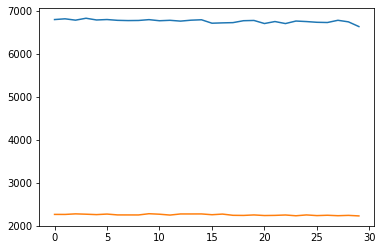

In [69]:
import matplotlib.pyplot as plt

plt.plot(list(range(0,30)),losses_train[:30])
plt.plot(list(range(0,30)),losses_test[:30])
plt.show()

мне кажется, что слишком маленьки набор данных

# Отчетность

В первую очередь в работе должна быть продемонстрирована ваша архитектура и процесс обучения (с кратким обоснованием выбора гиперпараметров).


Далее:

По задаче регрессии:



1.   Вывести коэффициент детерминации и средний квадрат ошибки
2.   Продемнострировать, что выбрано оптимальное соотношение train/test, путем перебора всех содержательных вариантов.

